In [9]:
# 코랩에 구글 드라이브 마운트
from google.colab import drive
drive.mount("/content/drive")

# 데이터 처리 모듈
import pandas as pd
import datetime
from dateutil.relativedelta import relativedelta

# 멀티프로세싱
import multiprocessing as mp
from multiprocessing import Pool

# 척도 변환 모듈(표준화, 정규화, 로버스트 정규화, 원핫인코딩(범주형에서 더미변수로 변환) 등)
from sklearn.preprocessing import *

# 결측값 관측 모듈
import missingno as msno

# 시각화 모듈
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

# 배열, 행렬 연산 모듈
import numpy as np

# 데이터 분할 모듈(훈련용 / 검증용 / 시험용)
from sklearn.model_selection import train_test_split

# 통계적 가설검정 및 계량화 모듈
# https://youtu.be/FtWEZw3kUho
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from scipy.interpolate import UnivariateSpline

# 타입 어노테이션 모듈
from typing import *

# 시간 관련 모듈
from tqdm import tqdm
from time import strptime, sleep

# 웹크롤링 / 스크래핑 관련 모듈
import requests
import io
import zipfile
from bs4 import BeautifulSoup
from xml.etree import ElementTree as ET

# 결측값 대체 및 특징 추출
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA, SparsePCA

# 연관규칙 분석 실행 모듈
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
merge_derivative_news_data = pd.read_csv("/content/drive/MyDrive/AfterLearnerProject/DataArchive/merge_derivative_news_data.csv", index_col = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
#improtance와 특이 지점을 비교하기 위해 importance값 상위 20개 추출(특이지점과 흡사)
sorted_importance = merge_derivative_news_data.sort_values(by='IMPORTANCE', ascending=False).head(20)[['IMPORTANCE', 'YYYYMMDD', 'TAG_LIST']]
sorted_importance

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,IMPORTANCE,YYYYMMDD,TAG_LIST
43463,168.84,2023-02-01,게임| 리니지| 결제| 아이템| 산업| 디아블로| 캐릭터| 장비| 그래픽| PC| ...
42206,146.29,2023-02-01,2차전지| 글로벌| 전기차| 전극| 자동차| 장비| 에너지| 배터리팩| 주행거리| 가전
4243,129.80,2023-01-25,코로나| 호텔| 중국| 면세점| 여행| 관광객| 화장품| 제주| 일본| 여권| 소비
60764,125.75,2023-02-02,우주| 공연| 축구| 스포츠| 경찰| 공기| 발사| 문화| 태풍| 조선| 겨울| 운동
19339,111.14,2023-01-26,가구| 전기| 가스
13673,107.20,2023-01-26,교육| 양육
14055,100.42,2023-01-26,일본| 캐릭터| 도깨비| 캔버스
7666,100.09,2023-01-25,기온| 추위| 바닷물| 난방| 겨울| 청주| 제주
5739,98.79,2023-01-25,제주| 공항| 기온
32676,96.63,2023-01-31,경찰| 테러


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

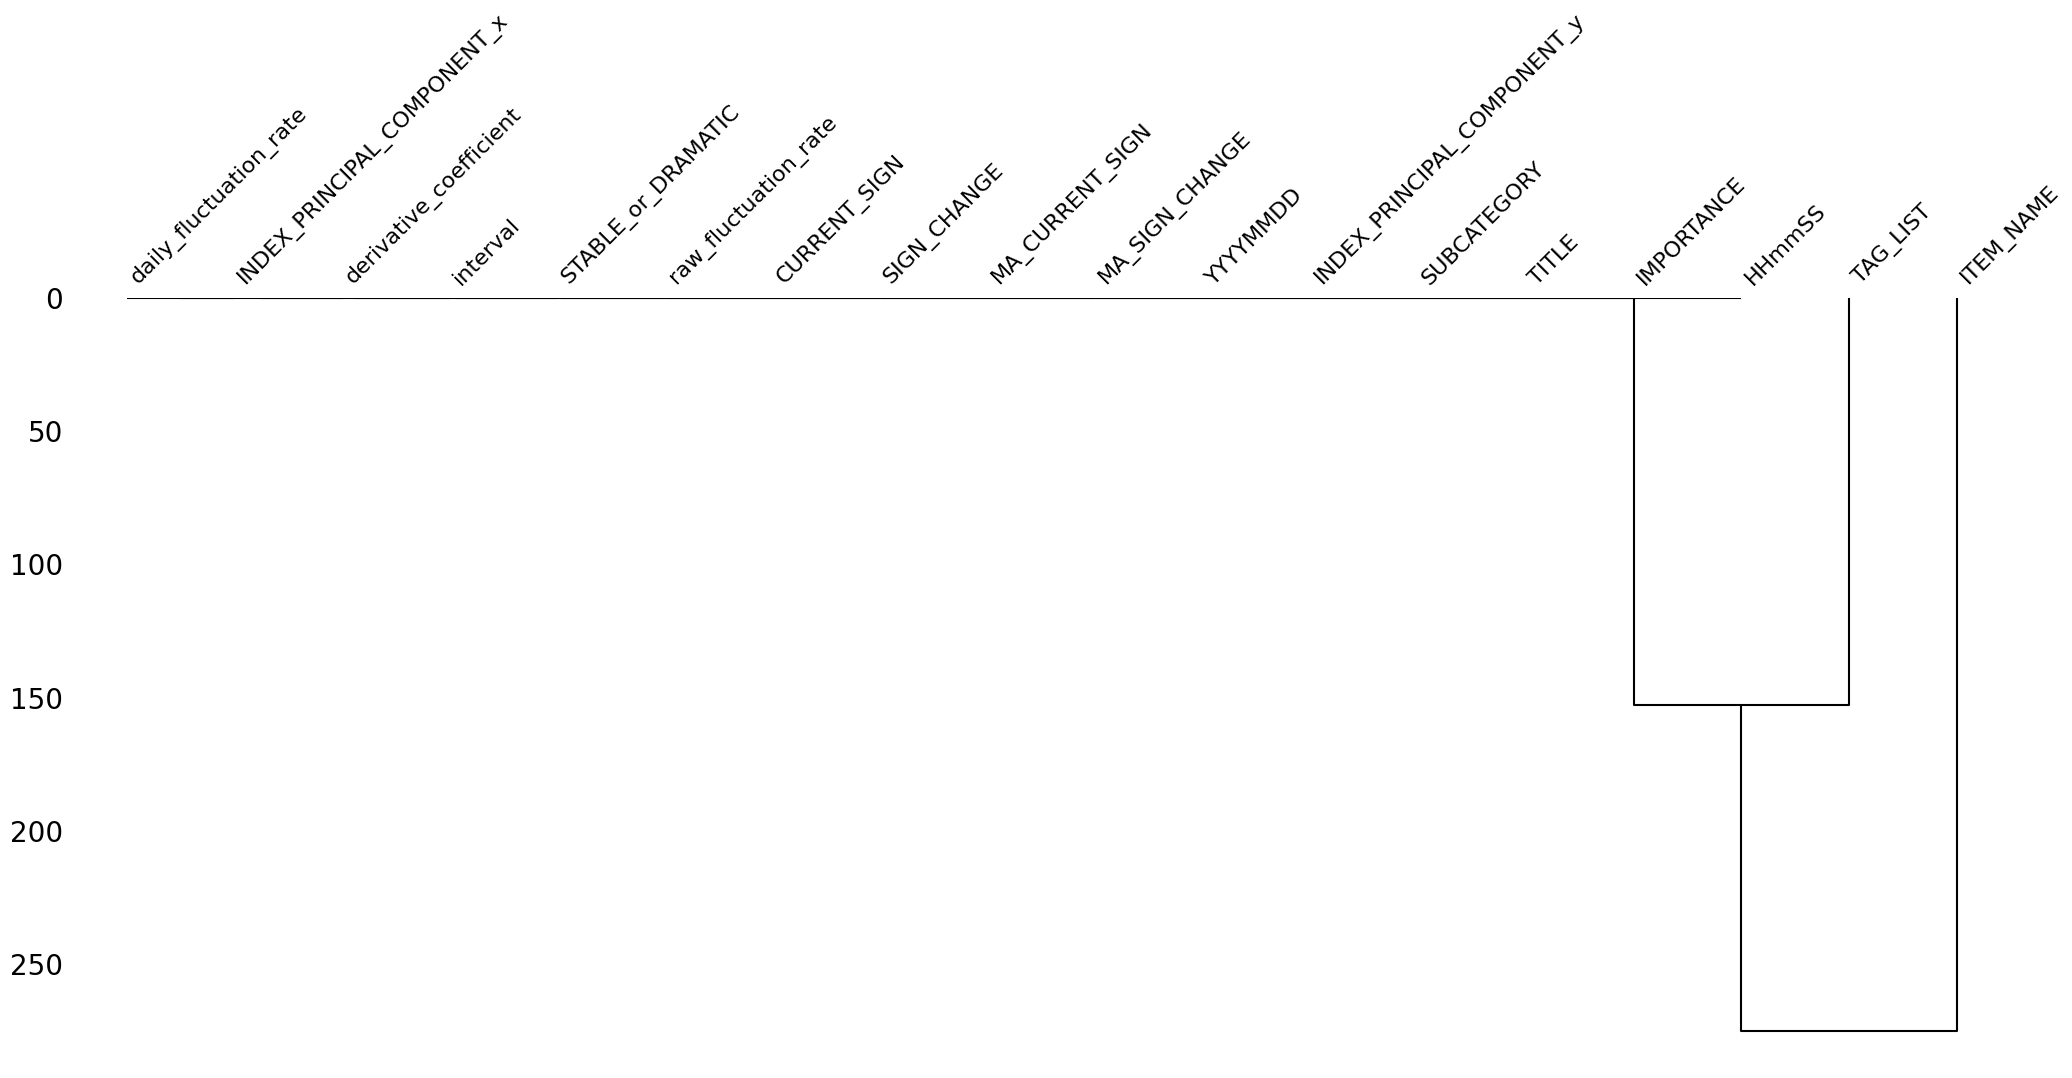

In [39]:
msno.dendrogram(merge_derivative_news_data)

In [12]:
merge_derivative_news_data_drop = merge_derivative_news_data.dropna(subset = ['TAG_LIST'])
# merge_derivative_news_data_drop

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
merge_derivative_news_data_drop['categorize'] = merge_derivative_news_data_drop['STABLE_or_DRAMATIC'].astype(str) + '_' + merge_derivative_news_data_drop['SIGN_CHANGE']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-13-c679de27879e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_derivative_news_data_drop['categorize'] = merge_derivative_news_data_drop['STABLE_or_DRAMATIC'].astype(str) + '_' + merge_derivative_news_data_drop['SIGN_CHANGE']


In [34]:
merge_derivative_news_data_drop[["TAG_LIST", "categorize"]].head()
  # "SUBCATEGORY", "ITEM_NAME"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,TAG_LIST,categorize
0,금융| 반도체| AI| 스타트업,DRAMATIC_Not Change
1,방역| 마스크| 극장,DRAMATIC_Not Change
2,갤럭시| 모바일| 스마트폰| 스냅드래곤| 판매량| 아이폰,DRAMATIC_Not Change
3,증권| 에너지| 공기업| 배당,DRAMATIC_Not Change
4,마스크| 방역| 병원| 코로나19| 중국| 환경| 환자,DRAMATIC_Not Change


In [ ]:
# apriory하기 위해 2차원 배열로 변경
merge_derivative_news_data_drop["TAG_SPLIT"] = merge_derivative_news_data_drop.TAG_LIST.str.split('|')
# merge_derivative_news_data_drop["TAG_SPLIT"]

In [ ]:
merge_derivative_news_data_drop["TAG_SPLIT"].isnull().sum()
display(merge_derivative_news_data_drop["TAG_SPLIT"])

In [18]:
merge_derivative_news_data_subset = merge_derivative_news_data_drop[["categorize", "SUBCATEGORY"]].values
  # "ITEM_NAME"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


```
  merge_derivative_news_data_drop["TAG_SPLIT"] = merge_derivative_news_data_drop["TAG_SPLIT"].apply(lambda x: str(x))
  merge_derivative_news_data_drop["TAG_SPLIT"] = merge_derivative_news_data_drop["TAG_SPLIT"].apply(eval)
  merge_derivative_news_data_tagset = list(itertools.chain*merge_derivative_news_data_drop["TAG_SPLIT"].values)
    # TypeError: can't multiply sequence by non-int of type 'type'

  merge_derivative_news_data_subsets = [
      [categorize, subcategory, item_name, tag_split[0] if isinstance(tag_split, list) else tag_split]
      for categorize, subcategory, item_name, tag_split in merge_derivative_news_data_subset
  1]
```

```
  def scanD(D, Ck, minSupport):
    
    ssCnt = {}
    for tid in D:
      for can in Ck:
        if can.issubset(tid):
          if not can in ssCnt:
            ssCnt[can] += 1
    
    retList = []
    supportData: Tuple = {}
    numItems = float( len(D) )

    for key in ssCnt:
      support = ssCnt[key] / numItems
      if support >= minSupport:
        retList.insert(0, key)
      supportData[key] = support

    return retList, supportData
```

In [19]:
# 범주화를 위해 만든 categorize 열을 4개로 범주화하기

# merge_derivative_news_data_drop['categorize'] = pd.Categorical(merge_derivative_news_data_drop['categorize'], categories=['A', 'B', 'C', 'D'])
# merge_derivative_news_data_drop['categorize'] = merge_derivative_news_data_drop['categorize'].cat.codes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# float가 포함된 TAG_LIST의 형식을 문자열로 선언 후 원핫인코딩, categorize열 범주화

# merge_derivative_news_data_drop['test'] = merge_derivative_news_data_drop['test'].astype(str)
# category_groups = merge_derivative_news_data_drop.groupby('categorize')
# transactions = [group['test'].tolist() for _, group in category_groups]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
# Apriori Analysis
# 여기서 전사ㅠ na.drop했는데 이러는거 보면 병렬처리 한 후 apriory 실행해야 할 듯 흑흑

def find_frequent_TAGsets(transaction_subset: pd.DataFrame, transaction_tagset: pd.Series,
                          minimum_support_threshold: float, minimum_confidence_threshold: float):
    transaction_subset_encoder = TransactionEncoder()
    transaction_tag_encoder = TransactionEncoder()

    transaction_subset_array = transaction_subset_encoder.fit_transform(transaction_subset)
    transaction_tag_array = transaction_tag_encoder.fit_transform(transaction_tagset)
    # display(transaction_subset_array, transaction_tag_array)

    transaction_subset_dataframe = pd.DataFrame(
        data = transaction_subset_array, columns = transaction_subset_encoder.columns_)
    transaction_tagset_dataframe = pd.DataFrame(
        data = transaction_tag_array, columns = transaction_tag_encoder.columns_)
    transaction_dataframe = pd.concat(
        [transaction_subset_dataframe, transaction_tagset_dataframe],
        axis = 1, ignore_index = False)

  # 이 지지도 이하의 규칙들은 배제하는 threshold (임계점 or 한계치)를 설정
    frequent_TAG_sets = apriori(
        transaction_dataframe,
        min_support = minimum_support_threshold,
        use_colnames = True)

  # apriori에 최소 지지도를 적용한 빈발원소집합, frequent_TAG_sets에서
  # [metric][confidence] 품목 사이의 연관정 정도를 측정하기 위해 사용되는 지표
  # [metric][lift] 두 사건이 서로 독립일 때와 비교해 얼마나 발생했는가에 대해 비율
  # print(apriori.__doc__)
    apriori_rules = association_rules(
        frequent_TAG_sets, metric = "confidence", min_threshold = minimum_confidence_threshold)
    return apriori_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
Counter(merge_derivative_news_data_drop['categorize'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Counter({'DRAMATIC_Not Change': 57557, 'DRAMATIC_Sign Change': 18186})

```
  # 병렬 처리

  # if __name__=="__main__":
      # num_threads=4
      # with Pool(processes=num_threads)as pool:
          # frequent_TAGsets=pool.map(find_frequent_TAGsets,transactions)
```

In [42]:
apriori_results: List = []
for threshold in [0.05, 0.01, 0.005]:
                # 0.001, 0.0005, 0.0001]:

  apriori_rules = find_frequent_TAGsets(
      transaction_subset = merge_derivative_news_data_subset,
        # TypeError: '<' not supported between instances of 'float' and 'str'
        # TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid
      transaction_tagset = merge_derivative_news_data_drop["TAG_SPLIT"],

      minimum_support_threshold = threshold,
      minimum_confidence_threshold = 0.4
  )
  apriori_results.append(apriori_rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
pd.set_option("display.max_row", None)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
apriori_results[0].sort_values("support", ascending = False)
  # apriori_results[0][
      # ( apriori_results[0]["lift"] > 1 ) &
      # ( apriori_results[0]["confidence"] >= 0.4 ) &
      # ( apriori_results[0]["support"] >= 0.2 ) ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(DRAMATIC_Not Change),(경제),0.759899,0.506331,0.381619,0.502198,0.991838,-0.003141,0.991698,-0.033139
1,(경제),(DRAMATIC_Not Change),0.506331,0.759899,0.381619,0.753696,0.991838,-0.003141,0.974818,-0.016397
3,(사회),(DRAMATIC_Not Change),0.222898,0.759899,0.171620,0.769946,1.013222,0.002240,1.043675,0.016793
2,(기술),(DRAMATIC_Not Change),0.173204,0.759899,0.130362,0.752649,0.990460,-0.001256,0.970690,-0.011516
7,(DRAMATIC_Sign Change),(경제),0.240101,0.506331,0.124711,0.519411,1.025833,0.003141,1.027216,0.033139
4,(정치),(DRAMATIC_Not Change),0.097567,0.759899,0.076297,0.782003,1.029088,0.002157,1.101396,0.031322
5,( 톰슨로이터),(DRAMATIC_Not Change),0.102769,0.759899,0.074977,0.729573,0.960093,-0.003116,0.887862,-0.044275
8,( 톰슨로이터),(경제),0.102769,0.506331,0.069577,0.677030,1.337130,0.017543,1.528529,0.281008
6,(톰슨로이터),(DRAMATIC_Not Change),0.090886,0.759899,0.066211,0.728501,0.958682,-0.002854,0.884354,-0.045262
9,(톰슨로이터),(경제),0.090886,0.506331,0.062012,0.682307,1.347552,0.015994,1.553919,0.283698


In [44]:
apriori_results[1].sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(DRAMATIC_Not Change),(경제),0.759899,0.506331,0.381619,0.502198,0.991838,-0.003141,0.991698,-0.033139
1,(경제),(DRAMATIC_Not Change),0.506331,0.759899,0.381619,0.753696,0.991838,-0.003141,0.974818,-0.016397
3,(사회),(DRAMATIC_Not Change),0.222898,0.759899,0.171620,0.769946,1.013222,0.002240,1.043675,0.016793
2,(기술),(DRAMATIC_Not Change),0.173204,0.759899,0.130362,0.752649,0.990460,-0.001256,0.970690,-0.011516
32,(DRAMATIC_Sign Change),(경제),0.240101,0.506331,0.124711,0.519411,1.025833,0.003141,1.027216,0.033139
4,(정치),(DRAMATIC_Not Change),0.097567,0.759899,0.076297,0.782003,1.029088,0.002157,1.101396,0.031322
21,( 톰슨로이터),(DRAMATIC_Not Change),0.102769,0.759899,0.074977,0.729573,0.960093,-0.003116,0.887862,-0.044275
43,( 톰슨로이터),(경제),0.102769,0.506331,0.069577,0.677030,1.337130,0.017543,1.528529,0.281008
31,(톰슨로이터),(DRAMATIC_Not Change),0.090886,0.759899,0.066211,0.728501,0.958682,-0.002854,0.884354,-0.045262
49,(톰슨로이터),(경제),0.090886,0.506331,0.062012,0.682307,1.347552,0.015994,1.553919,0.283698


In [45]:
apriori_results[2].sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(DRAMATIC_Not Change),(경제),0.759899,0.506331,0.381619,0.502198,0.991838,-3.140506e-03,0.991698,-0.033139
1,(경제),(DRAMATIC_Not Change),0.506331,0.759899,0.381619,0.753696,0.991838,-3.140506e-03,0.974818,-0.016397
3,(사회),(DRAMATIC_Not Change),0.222898,0.759899,0.171620,0.769946,1.013222,2.239571e-03,1.043675,0.016793
2,(기술),(DRAMATIC_Not Change),0.173204,0.759899,0.130362,0.752649,0.990460,-1.255691e-03,0.970690,-0.011516
83,(DRAMATIC_Sign Change),(경제),0.240101,0.506331,0.124711,0.519411,1.025833,3.140506e-03,1.027216,0.033139
4,(정치),(DRAMATIC_Not Change),0.005321,0.759899,0.076297,14.339950,18.870873,7.225435e-02,inf,0.952074
49,( 톰슨로이터),(DRAMATIC_Not Change),0.102769,0.759899,0.074977,0.729573,0.960093,-3.116469e-03,0.887862,-0.044275
109,( 톰슨로이터),(경제),0.102769,0.506331,0.069577,0.677030,1.337130,1.754251e-02,1.528529,0.281008
82,(톰슨로이터),(DRAMATIC_Not Change),0.090886,0.759899,0.066211,0.728501,0.958682,-2.853623e-03,0.884354,-0.045262
132,(톰슨로이터),(경제),0.090886,0.506331,0.062012,0.682307,1.347552,1.599382e-02,1.553919,0.283698


In [ ]:
"""
    MDAD_encoded = pd.DataFrame(transaction_array, columns=transaction_encoder.columns_)
    frequent_TAGsets=apriori(MDAD_encoded, min_support=0.1, use_colnames=True)
    return frequent_TAGsets
if __name__=="__main__":
    num_threads=4
    with Pool(processes=num_threads)as pool:
        frequent_TAGsets=pool.map(find_frequent_TAGsets,transactions)

# 결과출력
# for i, frequent_TAGsets in enumerate(frequent_TAGsets):
    # print(f"frequent TAGsets for Category {i+1}:")
    # print(frequent_TAGsets)
    # print()
"""

# 보기 좋게 정리

"""
apiriory = pd.Dataframe(te_result, columns = te.columns_)
print(tabulate(df.head(5), headers = 'keys', tablefmt = 'fancy_grid'))

itemset = apriori(df, min_support = 0.1, use_colnames = True)
itemset
print(itemset, '\n')
"""